# Mushroom Classification

Classifying whether a mushroom is **edible** or **poisonous** by its specification.

Dataset:
CSV file containing **8124** entries with 23 features.

The dataset is made available by UCI MAchine Learning.




In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')



In [5]:
#Data
data = pd.read_csv("mushrooms.csv")


In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Description of the features are in the feature_description.pdf file

In [10]:
data.shape

(8124, 23)

## EDA and Visualisation

In [12]:
count = data['class'].value_counts()  #Count the total number of entries

In [13]:
data['class'].unique() #total number of unique values in the class column

array(['p', 'e'], dtype=object)

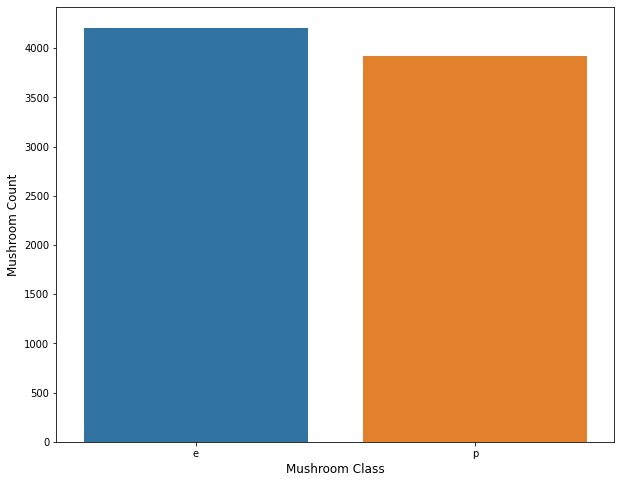

In [14]:
# Plot the count of "class" column 

plt.figure(figsize=(10, 8))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Mushroom Class', fontsize=12)
plt.ylabel('Mushroom Count', fontsize=12)
# plt.savefig('labelcount.png', format='png', dpi=900)
plt.show()

dataset is balanced

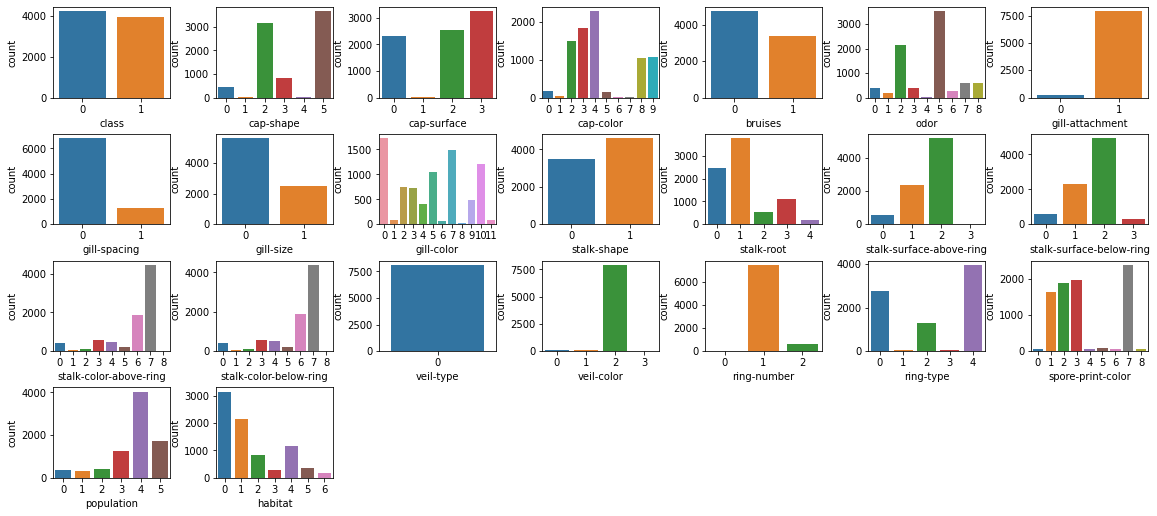

In [18]:
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(data.columns):
  figure.add_subplot(10, 7, i+1)
  sns.countplot(x = f"{c}", data=data)
  plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# plt.savefig('cat.png', format='png', dpi=1200)
plt.show()

Column **"veil-type"** is of same type and not contributing much.
So, drop that column

In [21]:
data.drop('veil-type', axis=1, inplace=True)

## Data Manipulation

In [22]:
data.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

Data columns are of "object type". 

 **LabelEncoder()** to encode the object data into integer.

In [23]:
label_encoder = LabelEncoder()
for col in data.columns:
  data[col] = label_encoder.fit_transform(data[col])

In [24]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


#
# Preparing data

In [25]:
X = data.drop('class', axis=1)
y = data['class']

In [26]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Classification Methods

In [30]:
#Function to train and predict data

def train_and_predict(clf):
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  return pred

In [31]:
#Function to get accuracy score

def train_predict_accuracy(clf):
  pred = train_and_predict(clf)
  return accuracy_score(y_test, pred)
  

In [32]:
#Initializing the classifiers

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()
lr_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()

In [37]:
# training and predicting data

classifiers = [dt_clf, rf_clf, nb_clf, lr_clf, svc_clf, knn_clf]
accuracy_score_dict = {}

for clf in classifiers:
  accuracy = train_predict_accuracy(clf)
  accuracy_score_dict[clf.__class__.__name__] = accuracy

In [34]:
print("Accuracy Score :\n")
for k, v in accuracy_score_dict.items():
  print(f"{k} : {v * 100 :.2f}%")

Accuracy Score :

DecisionTreeClassifier : 100.00%
RandomForestClassifier : 100.00%
GaussianNB : 93.02%
LogisticRegression : 95.35%
SVC : 98.95%
KNeighborsClassifier : 99.66%


Most classifiers provide almost 100% accuracy

In [38]:

important_features = dt_clf.feature_importances_
sorted_indexes = np.argsort(important_features)
features_list = X.columns.values

Plot the feature importance

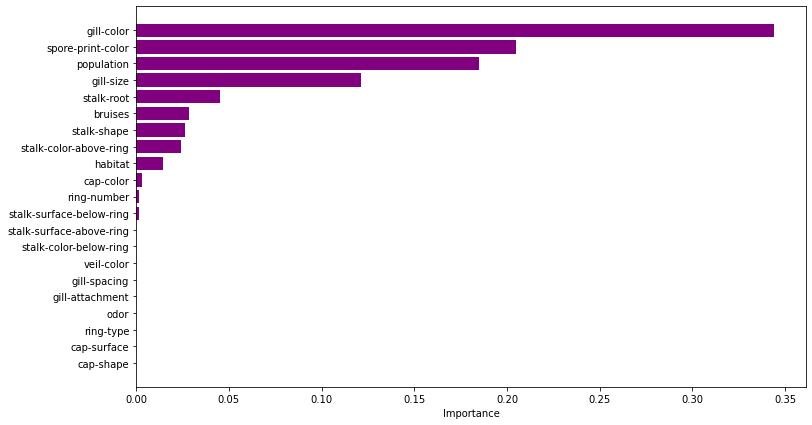

In [39]:
plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_indexes)), important_features[sorted_indexes], align='center', color='purple')
plt.yticks(range(len(sorted_indexes)), features_list[sorted_indexes])
plt.xlabel("Importance")
# plt.savefig("feature_importance.png", format='png', dpi=900)
plt.show()

Most important feature is **"gill-color"**

In [45]:
# confusion matrix

def c_matrix(pred, name):
  cm = confusion_matrix(y_test, pred)
  x_axis_labels = ["Edible", "Poisonous"]
  y_axis_labels = ["Edible", "Poisonous"]
  f, ax = plt.subplots(figsize =(7,7))
  sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("PREDICTED LABEL")
  plt.ylabel("TRUE LABEL")
  plt.title(f'Confusion Matrix of {name}');
  plt.savefig(f"{name}_c_matrix.png", format='png', dpi=900, bbox_inches='tight')
  plt.show()

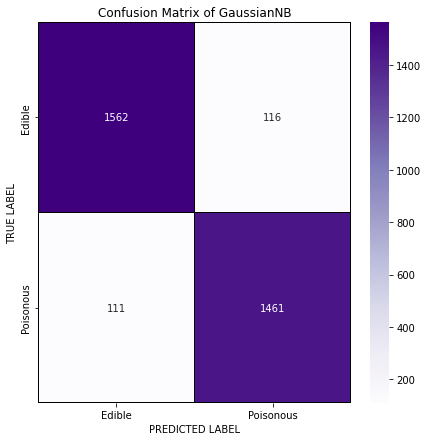

In [46]:
#Confusion Matrix for GaussianNB

nb_pred = train_and_predict(nb_clf)

c_matrix(nb_pred, 'GaussianNB')

Confusion Matrix for Logistic Regression

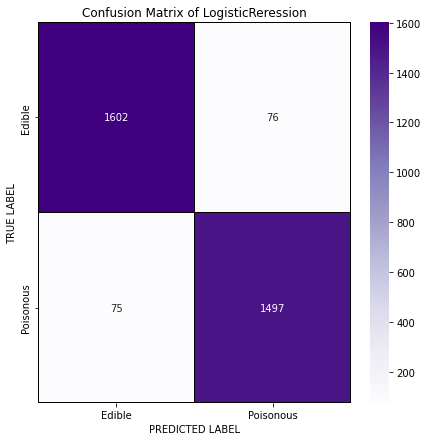

In [47]:
# Confusion Matrix for Logistic Regression

lr_pred = train_and_predict(lr_clf)

c_matrix(lr_pred, 'LogisticReression')


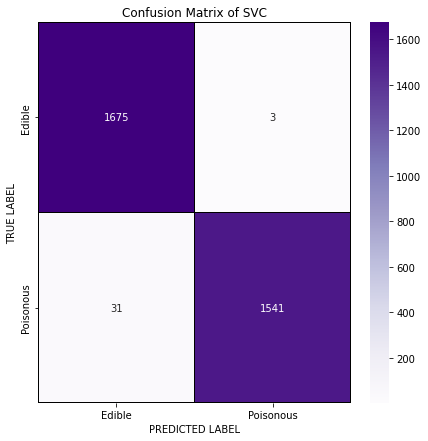

In [48]:
# Confusion Matrix for SVC

svc_pred = train_and_predict(svc_clf)
c_matrix(svc_pred, 'SVC')

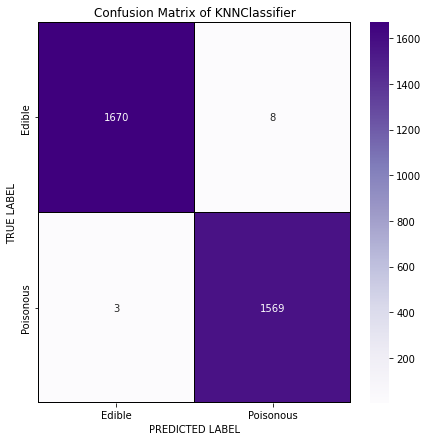

In [49]:
# Confusion Matrix for Knn classifier
knn_pred = train_and_predict(knn_clf)
c_matrix(knn_pred, 'KNNClassifier')